In [1]:
#!pip install --force-reinstall scikit-learn

# Task 1

In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import requests
import io
'''
function to download train and test data from url
prepares data for processing by creating tensor datasets and data loaders.
Also separates images and digits form tuples
'''
def load_data(train_url, test_url):
    train_response = requests.get(train_url)
    train_data = np.loadtxt(io.StringIO(train_response.text)) #reads data as string and converts to np array
    X_train = train_data[:, 1:].astype(np.float32)  #pixels reshaped into 2d array
    y_train = train_data[:, 0].astype(np.int64)   #labels/digits

    test_response = requests.get(test_url)
    test_data = np.loadtxt(io.StringIO(test_response.text))
    X_test = test_data[:, 1:].astype(np.float32)
    y_test = test_data[:, 0].astype(np.int64)

    return X_train, y_train, X_test, y_test

train_url = "http://www.cs.fsu.edu/~liux/courses/deepRL/assignments/zip_train.txt"
test_url = "http://www.cs.fsu.edu/~liux/courses/deepRL/assignments/zip_test.txt"

'''
input size = 16*16 pixels (256)
hidden_size = one hidden layer w 128 units
num_classes = 10 digits 0-9
dropout_prob = 0.5 (dropout later probability)
  -randomly sets some activations to 0 to prevent overfitting
init_type = 'effective' how weights should be initialized
'''
class FullyConnectedNet(nn.Module):
    def __init__(self, input_size=256, hidden_size=128, num_classes=10, dropout_prob=0.5, init_type='effective'):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) #transform input size to hidden layer size
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob) #apply dropout after activation to regularize model
        self.fc2 = nn.Linear(hidden_size, num_classes)

        self._initialize_weights(init_type)

    def _initialize_weights(self, init_type):
        if init_type == 'slow': #uniform distribution
            nn.init.uniform_(self.fc1.weight, -0.01, 0.01)
            nn.init.uniform_(self.fc2.weight, -0.01, 0.01)
        elif init_type == 'effective': #xavier uniform initialization
            nn.init.xavier_uniform_(self.fc1.weight)
            nn.init.xavier_uniform_(self.fc2.weight)
        elif init_type == 'too_fast':#use large uniform distribution (makes model converge quickly)
            nn.init.uniform_(self.fc1.weight, -1.0, 1.0)
            nn.init.uniform_(self.fc2.weight, -1.0, 1.0)
        #intiializes biases in all layers to 0
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)

#flattens input and applies each layer
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
#create model instance and print architecture
fc_net = FullyConnectedNet()
print("Network Architecture: ")
print(fc_net)


Network Architecture: 
FullyConnectedNet(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


# Task 2

Loading data...

1: Parameter Initialization

Testing slow initialization
Epoch 1/100: Train Loss: 2.2830, Train Acc: 0.2673, Val Loss: 2.2478, Val Acc: 0.3054
Epoch 2/100: Train Loss: 2.1293, Train Acc: 0.2954, Val Loss: 1.9529, Val Acc: 0.3049
Epoch 3/100: Train Loss: 1.7857, Train Acc: 0.3408, Val Loss: 1.6222, Val Acc: 0.4170
Epoch 4/100: Train Loss: 1.4924, Train Acc: 0.4923, Val Loss: 1.3473, Val Acc: 0.5635
Epoch 5/100: Train Loss: 1.2295, Train Acc: 0.6227, Val Loss: 1.1003, Val Acc: 0.7170
Epoch 6/100: Train Loss: 1.0009, Train Acc: 0.7197, Val Loss: 0.8984, Val Acc: 0.7753
Epoch 7/100: Train Loss: 0.8249, Train Acc: 0.7804, Val Loss: 0.7494, Val Acc: 0.8146
Epoch 8/100: Train Loss: 0.6904, Train Acc: 0.8144, Val Loss: 0.6435, Val Acc: 0.8421
Epoch 9/100: Train Loss: 0.6048, Train Acc: 0.8371, Val Loss: 0.5745, Val Acc: 0.8460
Epoch 10/100: Train Loss: 0.5403, Train Acc: 0.8528, Val Loss: 0.5231, Val Acc: 0.8555
Epoch 11/100: Train Loss: 0.4884, Train Acc: 0.8681, Val Loss: 0.

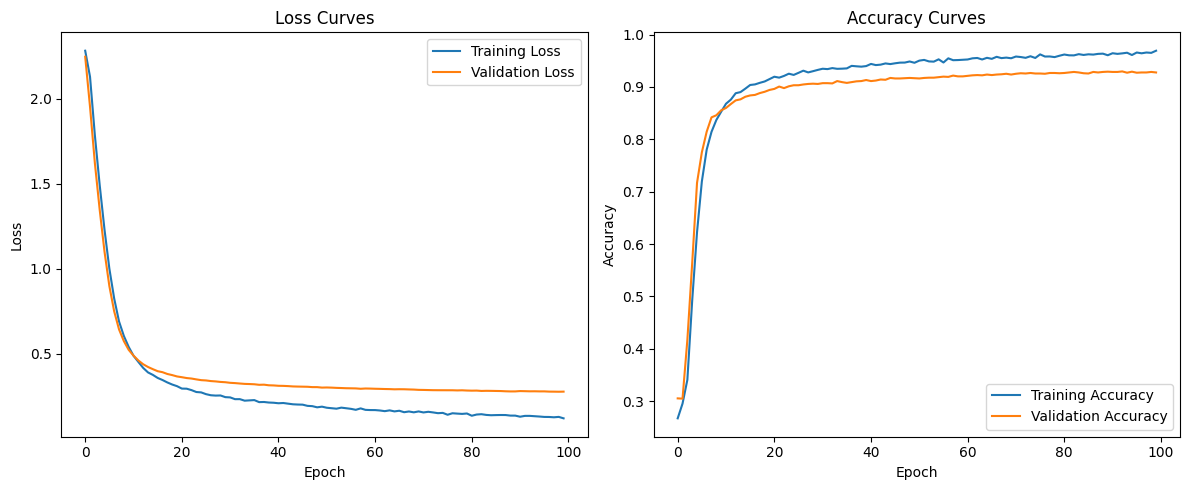


Testing effective initialization
Epoch 1/100: Train Loss: 1.6958, Train Acc: 0.4416, Val Loss: 1.0095, Val Acc: 0.7608
Epoch 2/100: Train Loss: 0.9774, Train Acc: 0.7007, Val Loss: 0.6978, Val Acc: 0.8321
Epoch 3/100: Train Loss: 0.7353, Train Acc: 0.7852, Val Loss: 0.5671, Val Acc: 0.8495
Epoch 4/100: Train Loss: 0.6110, Train Acc: 0.8220, Val Loss: 0.4997, Val Acc: 0.8630
Epoch 5/100: Train Loss: 0.5337, Train Acc: 0.8461, Val Loss: 0.4594, Val Acc: 0.8714
Epoch 6/100: Train Loss: 0.5007, Train Acc: 0.8530, Val Loss: 0.4334, Val Acc: 0.8749
Epoch 7/100: Train Loss: 0.4499, Train Acc: 0.8700, Val Loss: 0.4125, Val Acc: 0.8779
Epoch 8/100: Train Loss: 0.4248, Train Acc: 0.8766, Val Loss: 0.3988, Val Acc: 0.8839
Epoch 9/100: Train Loss: 0.3891, Train Acc: 0.8885, Val Loss: 0.3890, Val Acc: 0.8894
Epoch 10/100: Train Loss: 0.3854, Train Acc: 0.8867, Val Loss: 0.3789, Val Acc: 0.8894
Epoch 11/100: Train Loss: 0.3695, Train Acc: 0.8973, Val Loss: 0.3716, Val Acc: 0.8944
Epoch 12/100: Trai

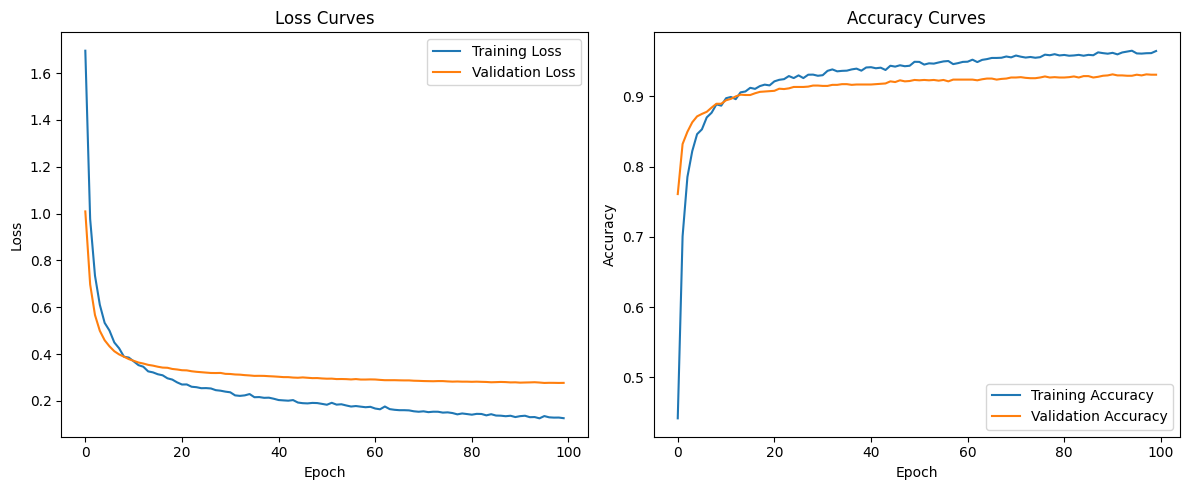


Testing too_fast initialization
Epoch 1/100: Train Loss: 26.2531, Train Acc: 0.3758, Val Loss: 5.3192, Val Acc: 0.6766
Epoch 2/100: Train Loss: 9.1203, Train Acc: 0.5804, Val Loss: 3.2593, Val Acc: 0.7638
Epoch 3/100: Train Loss: 5.6754, Train Acc: 0.6641, Val Loss: 2.5913, Val Acc: 0.8022
Epoch 4/100: Train Loss: 4.3708, Train Acc: 0.6937, Val Loss: 2.2252, Val Acc: 0.8146
Epoch 5/100: Train Loss: 3.5958, Train Acc: 0.7058, Val Loss: 1.9486, Val Acc: 0.8231
Epoch 6/100: Train Loss: 2.9696, Train Acc: 0.7256, Val Loss: 1.7451, Val Acc: 0.8286
Epoch 7/100: Train Loss: 2.5496, Train Acc: 0.7327, Val Loss: 1.5695, Val Acc: 0.8366
Epoch 8/100: Train Loss: 2.2746, Train Acc: 0.7494, Val Loss: 1.4791, Val Acc: 0.8376
Epoch 9/100: Train Loss: 2.1001, Train Acc: 0.7517, Val Loss: 1.3703, Val Acc: 0.8401
Epoch 10/100: Train Loss: 1.9523, Train Acc: 0.7608, Val Loss: 1.2829, Val Acc: 0.8455
Epoch 11/100: Train Loss: 1.8114, Train Acc: 0.7667, Val Loss: 1.1996, Val Acc: 0.8510
Epoch 12/100: Trai

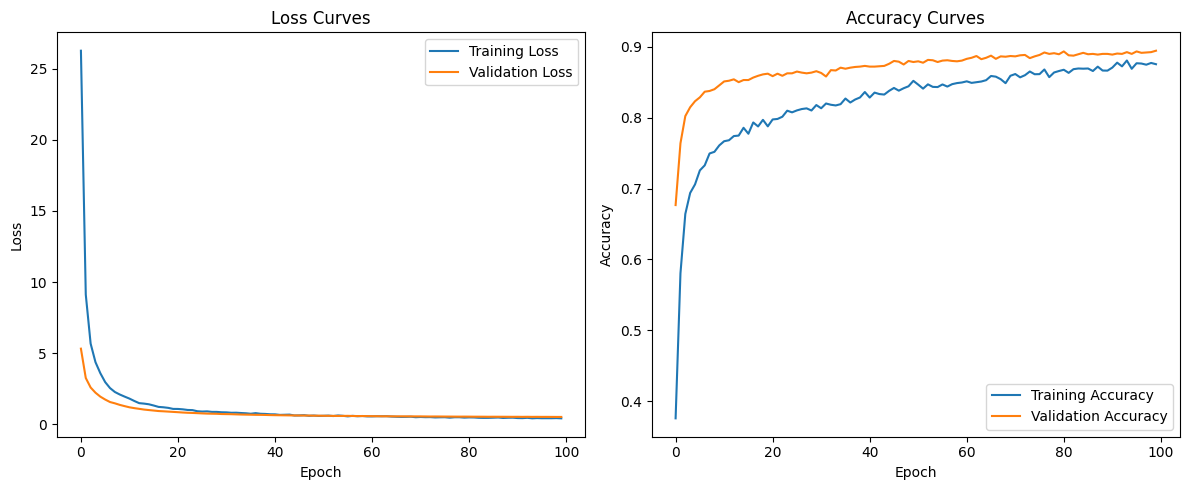


2: Learning Rate

Testing learning rate: 0.0001
Epoch 1/100: Train Loss: 3.2732, Train Acc: 0.0750, Val Loss: 2.8548, Val Acc: 0.0807
Epoch 2/100: Train Loss: 3.1507, Train Acc: 0.0871, Val Loss: 2.7607, Val Acc: 0.0797
Epoch 3/100: Train Loss: 3.0583, Train Acc: 0.0952, Val Loss: 2.6793, Val Acc: 0.0912
Epoch 4/100: Train Loss: 2.9546, Train Acc: 0.1038, Val Loss: 2.6073, Val Acc: 0.1460
Epoch 5/100: Train Loss: 2.8881, Train Acc: 0.1132, Val Loss: 2.5420, Val Acc: 0.1759
Epoch 6/100: Train Loss: 2.8017, Train Acc: 0.1314, Val Loss: 2.4829, Val Acc: 0.1913
Epoch 7/100: Train Loss: 2.7715, Train Acc: 0.1343, Val Loss: 2.4291, Val Acc: 0.2033
Epoch 8/100: Train Loss: 2.6865, Train Acc: 0.1506, Val Loss: 2.3793, Val Acc: 0.2138
Epoch 9/100: Train Loss: 2.6382, Train Acc: 0.1625, Val Loss: 2.3330, Val Acc: 0.2282
Epoch 10/100: Train Loss: 2.5604, Train Acc: 0.1767, Val Loss: 2.2903, Val Acc: 0.2436
Epoch 11/100: Train Loss: 2.5440, Train Acc: 0.1850, Val Loss: 2.2505, Val Acc: 0.2541
Epo

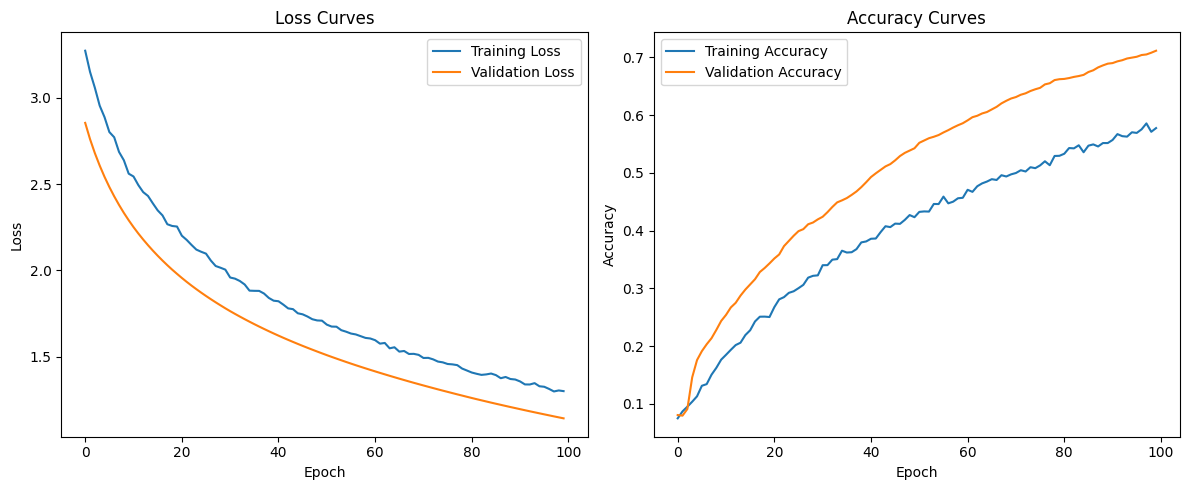


Testing learning rate: 0.01
Epoch 1/100: Train Loss: 1.6601, Train Acc: 0.4558, Val Loss: 0.9437, Val Acc: 0.7678
Epoch 2/100: Train Loss: 0.9259, Train Acc: 0.7110, Val Loss: 0.6551, Val Acc: 0.8361
Epoch 3/100: Train Loss: 0.7041, Train Acc: 0.7867, Val Loss: 0.5411, Val Acc: 0.8550
Epoch 4/100: Train Loss: 0.5976, Train Acc: 0.8217, Val Loss: 0.4810, Val Acc: 0.8685
Epoch 5/100: Train Loss: 0.5273, Train Acc: 0.8398, Val Loss: 0.4418, Val Acc: 0.8774
Epoch 6/100: Train Loss: 0.4738, Train Acc: 0.8620, Val Loss: 0.4160, Val Acc: 0.8824
Epoch 7/100: Train Loss: 0.4398, Train Acc: 0.8681, Val Loss: 0.3955, Val Acc: 0.8879
Epoch 8/100: Train Loss: 0.4164, Train Acc: 0.8768, Val Loss: 0.3828, Val Acc: 0.8899
Epoch 9/100: Train Loss: 0.3936, Train Acc: 0.8859, Val Loss: 0.3738, Val Acc: 0.8919
Epoch 10/100: Train Loss: 0.3710, Train Acc: 0.8943, Val Loss: 0.3652, Val Acc: 0.8954
Epoch 11/100: Train Loss: 0.3432, Train Acc: 0.8985, Val Loss: 0.3562, Val Acc: 0.8989
Epoch 12/100: Train Los

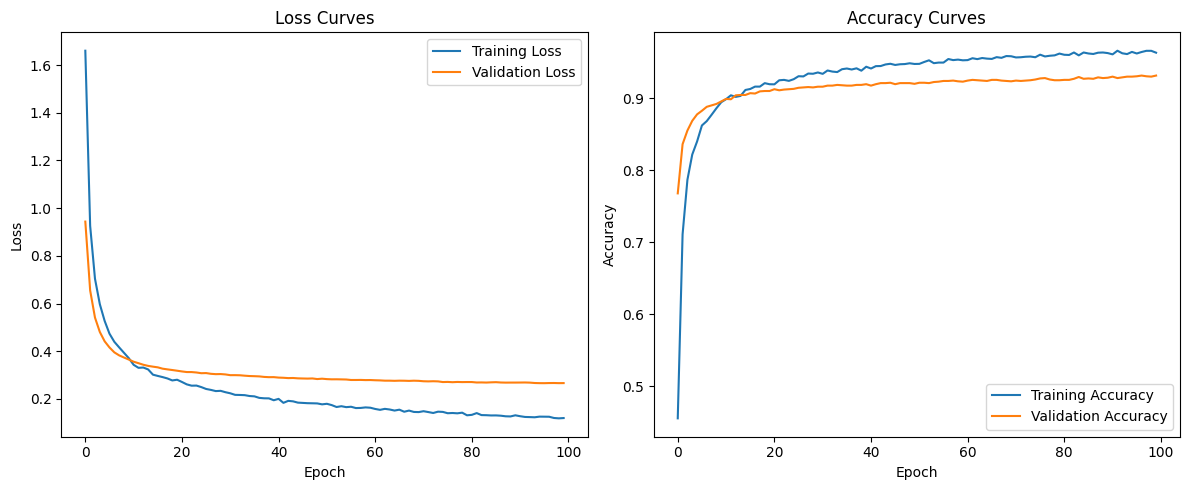


Testing learning rate: 1.0
Epoch 1/100: Train Loss: 2.3832, Train Acc: 0.4023, Val Loss: 1.3033, Val Acc: 0.5685
Epoch 2/100: Train Loss: 1.4079, Train Acc: 0.5116, Val Loss: 0.9766, Val Acc: 0.7334
Epoch 3/100: Train Loss: 1.3721, Train Acc: 0.5803, Val Loss: 1.1000, Val Acc: 0.6492
Epoch 4/100: Train Loss: 1.3390, Train Acc: 0.5796, Val Loss: 0.9505, Val Acc: 0.7030
Epoch 5/100: Train Loss: 1.2075, Train Acc: 0.6268, Val Loss: 0.8682, Val Acc: 0.7394
Epoch 6/100: Train Loss: 1.1779, Train Acc: 0.6331, Val Loss: 1.1243, Val Acc: 0.7414
Epoch 7/100: Train Loss: 1.0811, Train Acc: 0.6664, Val Loss: 0.8958, Val Acc: 0.7613
Epoch 8/100: Train Loss: 1.0699, Train Acc: 0.6826, Val Loss: 0.8947, Val Acc: 0.8082
Epoch 9/100: Train Loss: 1.0307, Train Acc: 0.6810, Val Loss: 0.8089, Val Acc: 0.7853
Epoch 10/100: Train Loss: 0.9642, Train Acc: 0.7072, Val Loss: 0.8013, Val Acc: 0.8037
Epoch 11/100: Train Loss: 1.0855, Train Acc: 0.6839, Val Loss: 0.8724, Val Acc: 0.7897
Epoch 12/100: Train Loss

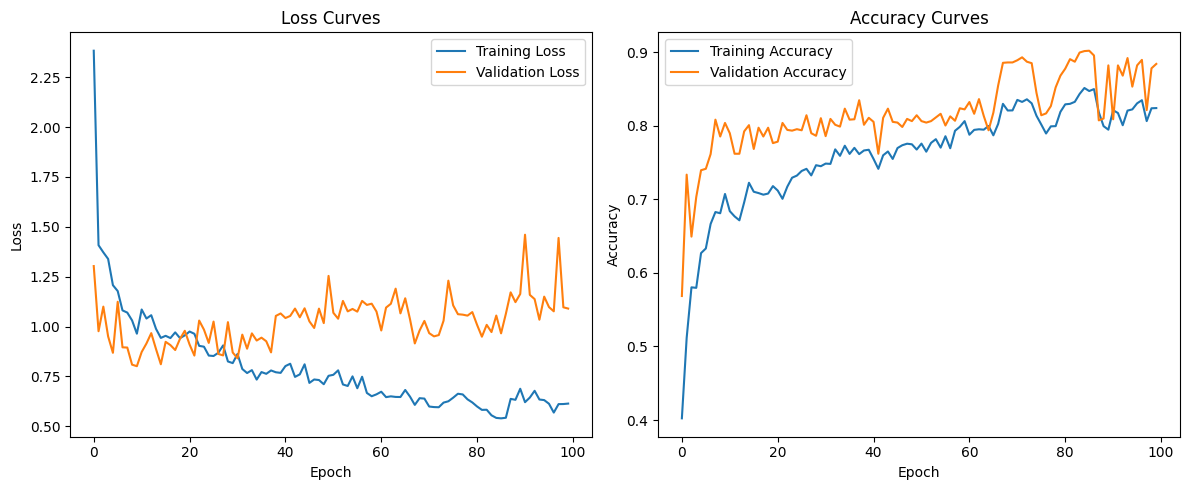

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import requests
import io
import time

def train_model(model, train_loader, val_loader, optimizer, criterion, epochs=100):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward() #apply backpass and update weights w next line
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / total
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        # eval mode so no gradient computations
        #computes predictions and losses for each batch
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        epoch_val_loss = val_loss / total
        epoch_val_acc = correct / total
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_acc)

        print(f'Epoch {epoch+1}/{epochs}: '
              f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, '
              f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}')

    return train_losses, val_losses, train_accuracies, val_accuracies

#evalate model accuracy on test data
def evaluate_model(model, test_loader):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predictions.cpu().numpy())

    acc = accuracy_score(y_true, y_pred) #calculat accuracy with sklearn library
    print(f'Test Accuracy: {acc:.4f}')
    return acc

# Plots
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss Curves')
    ax1.legend()

    ax2.plot(train_accuracies, label='Training Accuracy')
    ax2.plot(val_accuracies, label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy Curves')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Parameter Initialization Experiment
#test the 3 weight initialization methods
def initialization(X_train, y_train, X_test, y_test, batch_size=64, lr=0.01, epochs=100):
    init_types = ['slow', 'effective', 'too_fast']
    results = {}

    # Convertinput data to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # create datasets and loaders
    #tensor dataset objects pair features and labels
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    #dataloaders batches during training
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    for init_type in init_types:
        print(f"\nTesting {init_type} initialization")
        model = FullyConnectedNet(dropout_prob=0.5, init_type=init_type)
        criterion = nn.CrossEntropyLoss()#loss funciton
        optimizer = optim.SGD(model.parameters(), lr=lr)#stochastic gradient descent optimizer

        start_time = time.time()
        train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, train_loader, test_loader, optimizer, criterion, epochs=epochs)
        end_time = time.time()

        test_acc = evaluate_model(model, test_loader)
        #store results as dict
        results[init_type] = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies,
            'test_accuracy': test_acc,
            'training_time': end_time - start_time
        }

        plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)

    return results

# Learning Rate Experiment
def learning_rate(X_train, y_train, X_test, y_test, batch_size=64, init_type='effective', epochs=100):
    learning_rates = [0.0001, 0.01, 1.0]
    results = {}

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    for lr in learning_rates:
        print(f"\nTesting learning rate: {lr}")
        model = FullyConnectedNet(dropout_prob=0.5, init_type=init_type)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=lr)

        start_time = time.time()
        train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, train_loader, test_loader, optimizer, criterion, epochs=epochs)
        end_time = time.time()

        test_acc = evaluate_model(model, test_loader)

        results[lr] = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies,
            'test_accuracy': test_acc,
            'training_time': end_time - start_time
        }

        plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)

    return results


#main function
if __name__ == "__main__":
    print("Loading data...")
    X_train, y_train, X_test, y_test = load_data(train_url, test_url)

    print("\n1: Parameter Initialization")
    init_results = initialization(X_train, y_train, X_test, y_test)

    print("\n2: Learning Rate")
    lr_results = learning_rate(X_train, y_train, X_test, y_test)


#Task 2 Analysis

**1) using small values near zero (-0.01, 0.01)**


---


  gradient Impact: small initial weights create small activations throughout the network. This also leads to small gradients during backpropagation.

  Expected Behavior: It will take many epochs for us to see performance in the graph. The training loss will also decrease at a relatively slow rate.

  **2) Using the Xavier initialization formula**


---

This method is most suited for this network architecture as it sets the weights based on how many neurons are connected to each layer.

Gradient Impact:The gradients of this network follow a consistent magnitude during backpropagation.

Expected Behavior: As seen in the graphs, the training loss begins to decrease at a steady rate. Accuracy improves as well. There are no dramatic fluctuations in the graphs.

**3) Uniform/ Too fast method**


---



Gradient Impact: Using large intitial gradients causes dramatic weight updates during optimization.

Expected Behavior:Early on the training is very rapid and unstable. The network will also be oscilating instead of decreasing/growing at a steady rate.

**Learning Rate Experiment**

**Small LR = 0.0001**


---


Gradient Impact: Each parameter receives very small updates and the dropout rate further reduces the magnitude of each gradient.

Expected behavior:
During the initial training, it will be hard to tell if there is any improvement with loss or accuracy. Training time is fast, but the model will have poor accuracy.

**Medium LR = 0.01**


---


Gradient Impact: since the updates to each weight are moderate, we can see progress in training without overshooting. This rate will also compensate for reduced learning from dropout.

Expected behavior: There will be a smooth training curve with decreasing loss over time.

**Large LR = 1.0**


---

Gradient Impact: Each weight is dramatically changed during each pass. We should see the weights oscilating as well.

Expected behavior: There will be large spikes in the graphs and loss will increase over time. The model seems like it is training quickly, but there is no improvement in performance.


# Task 3


Testing dropout rate: 0.9
Epoch 1/100: Train Loss: 2.5567, Train Acc: 0.2296, Val Loss: 1.5942, Val Acc: 0.5989
Epoch 2/100: Train Loss: 1.9095, Train Acc: 0.3349, Val Loss: 1.3381, Val Acc: 0.7245
Epoch 3/100: Train Loss: 1.7173, Train Acc: 0.4023, Val Loss: 1.1565, Val Acc: 0.7693
Epoch 4/100: Train Loss: 1.5795, Train Acc: 0.4429, Val Loss: 1.0082, Val Acc: 0.7952
Epoch 5/100: Train Loss: 1.4756, Train Acc: 0.4741, Val Loss: 0.8940, Val Acc: 0.8246
Epoch 6/100: Train Loss: 1.3705, Train Acc: 0.5084, Val Loss: 0.8007, Val Acc: 0.8416
Epoch 7/100: Train Loss: 1.3091, Train Acc: 0.5341, Val Loss: 0.7394, Val Acc: 0.8500
Epoch 8/100: Train Loss: 1.2567, Train Acc: 0.5452, Val Loss: 0.6837, Val Acc: 0.8595
Epoch 9/100: Train Loss: 1.1988, Train Acc: 0.5665, Val Loss: 0.6380, Val Acc: 0.8665
Epoch 10/100: Train Loss: 1.1849, Train Acc: 0.5806, Val Loss: 0.6156, Val Acc: 0.8719
Epoch 11/100: Train Loss: 1.1500, Train Acc: 0.5820, Val Loss: 0.5836, Val Acc: 0.8744
Epoch 12/100: Train Loss:

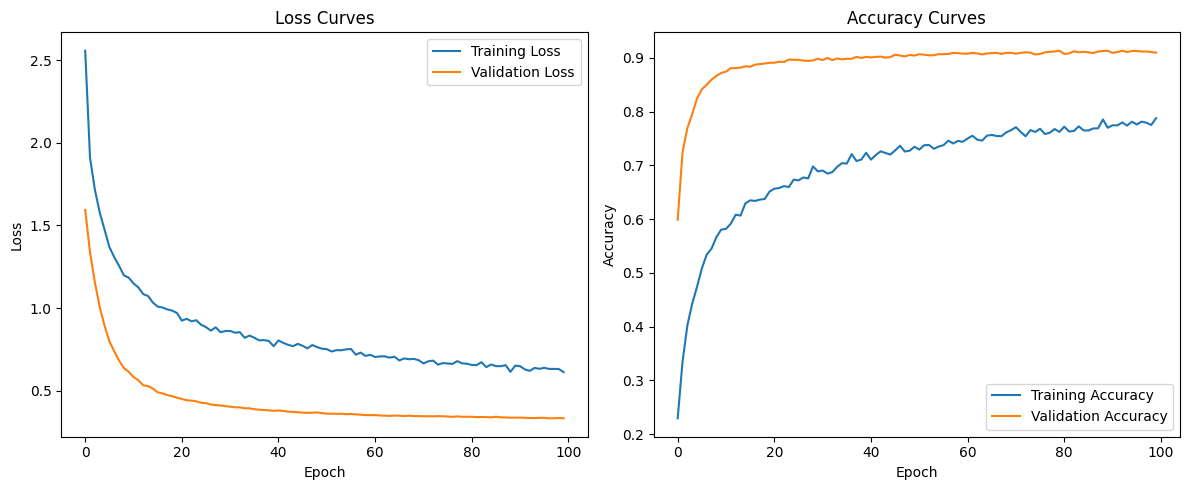


Dropout Rate Comparison:
------------------------
Dropout Rate | Test Accuracy | Training Time (s)
------------------------
0.9          | 0.9098      | 25.18


In [4]:
#drouput experiment
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def dropout(X_train, y_train, X_test, y_test, batch_size=64, lr=0.01, epochs=100):
  dropout_rates = [0.9]
  results = {}

  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
  y_train_tensor = torch.tensor(y_train, dtype=torch.long)
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
  y_test_tensor = torch.tensor(y_test, dtype=torch.long)

  train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
  test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  for dropout_prob in dropout_rates:
    print(f"\nTesting dropout rate: {dropout_prob}")
    model = FullyConnectedNet(input_size=256, dropout_prob=dropout_prob, init_type='effective')
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    start_time = time.time()
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, test_loader, optimizer, criterion, epochs=epochs)
    training_time = time.time() - start_time

    test_acc = evaluate_model(model, test_loader)

    results[dropout_prob] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_accuracy': test_acc,
        'training_time': training_time
    }

    plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies)

    print("\nDropout Rate Comparison:")
    print("------------------------")
    print("Dropout Rate | Test Accuracy | Training Time (s)")
    print("------------------------")
    for rate, data in results.items():
        print(f"{rate:.1f}          | {data['test_accuracy']:.4f}      | {data['training_time']:.2f}")

    return results


train_url = "http://www.cs.fsu.edu/~liux/courses/deepRL/assignments/zip_train.txt"
test_url = "http://www.cs.fsu.edu/~liux/courses/deepRL/assignments/zip_test.txt"

X_train, y_train, X_test, y_test = load_data(train_url, test_url)

final_eval = dropout(X_train, y_train, X_test, y_test)


#Task 3 Analysis
I've applied the dropout probablility (0.5) to the forward pass of the ReLU activation layer.

During testing, all neurons are acive, but during training each neuron in the hidden layer has a probability of being dropped to 0.

I experimented with a high dropout rate of o.0 and this means only 10% of the neurons stay active during the forward pass.

Expected Behavior:
Learning will be very slow and there should be high variance in training between each batch since the network has a limited capacity during each pass. It will take a relatively large number of epochs to see any good performance.

In the inital experiment, I used a dropout rate of 0.5 and this was more effective because it reduces graident magnitudes, and aids in the prevention of overfitting. a dropout rate of 0.5 means that only half of the neurons might be deactivated, and this allows the model to generalize more on different data instead of relying on only specific neurons.